# Untitled

#### 2023-05-03

``` r
library(dplyr)
library(doParallel)
library(NbClust)
```

``` r
c1 <- makePSOCKcluster(4)
registerDoParallel(c1)
```

``` r
setwd("C:/Users/jaehy/Desktop/전종설 데이터")
df <- read.csv("gas_address.csv", fileEncoding = "cp949")
df1 <- df%>%
  select(위도, 경도)
str(df1)
```

``` hljs
## 'data.frame':    473 obs. of  2 variables:
##  $ 위도: num  37.6 37.5 37.5 37.6 37.5 ...
##  $ 경도: num  127 127 127 127 127 ...
```

``` r
nclust <- NbClust(df1, min.nc=2, max.nc=107, method="kmeans")
```

``` hljs
## Warning in pf(beale, pp, df2): NaN이 생성되었습니다

## Warning in pf(beale, pp, df2): NaN이 생성되었습니다

## Warning in pf(beale, pp, df2): NaN이 생성되었습니다
```

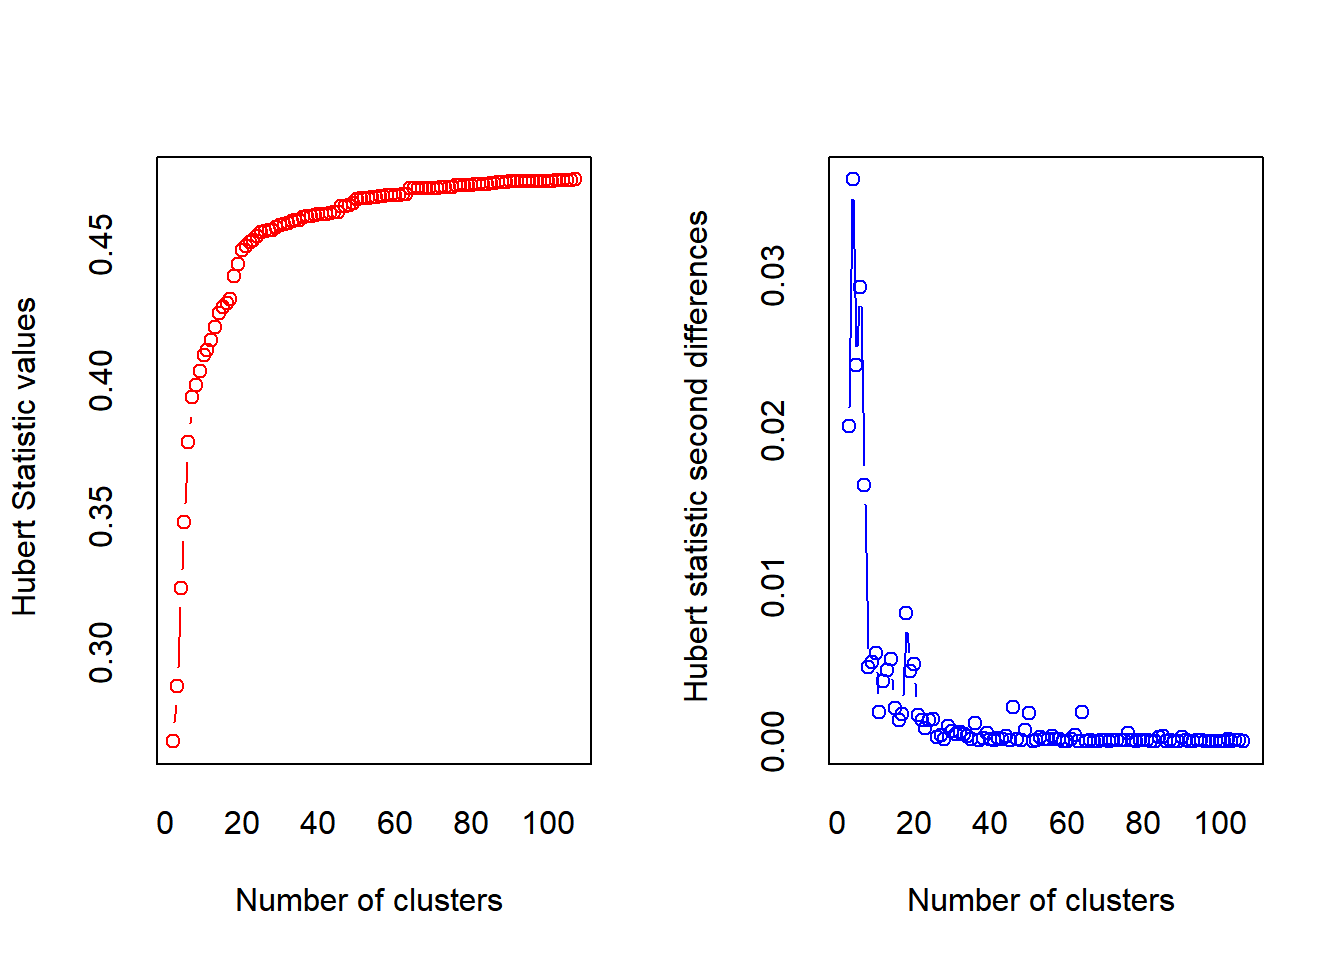

``` hljs
## *** : The Hubert index is a graphical method of determining the number of clusters.
##                 In the plot of Hubert index, we seek a significant knee that corresponds to a 
##                 significant increase of the value of the measure i.e the significant peak in Hubert
##                 index second differences plot. 
## 
```

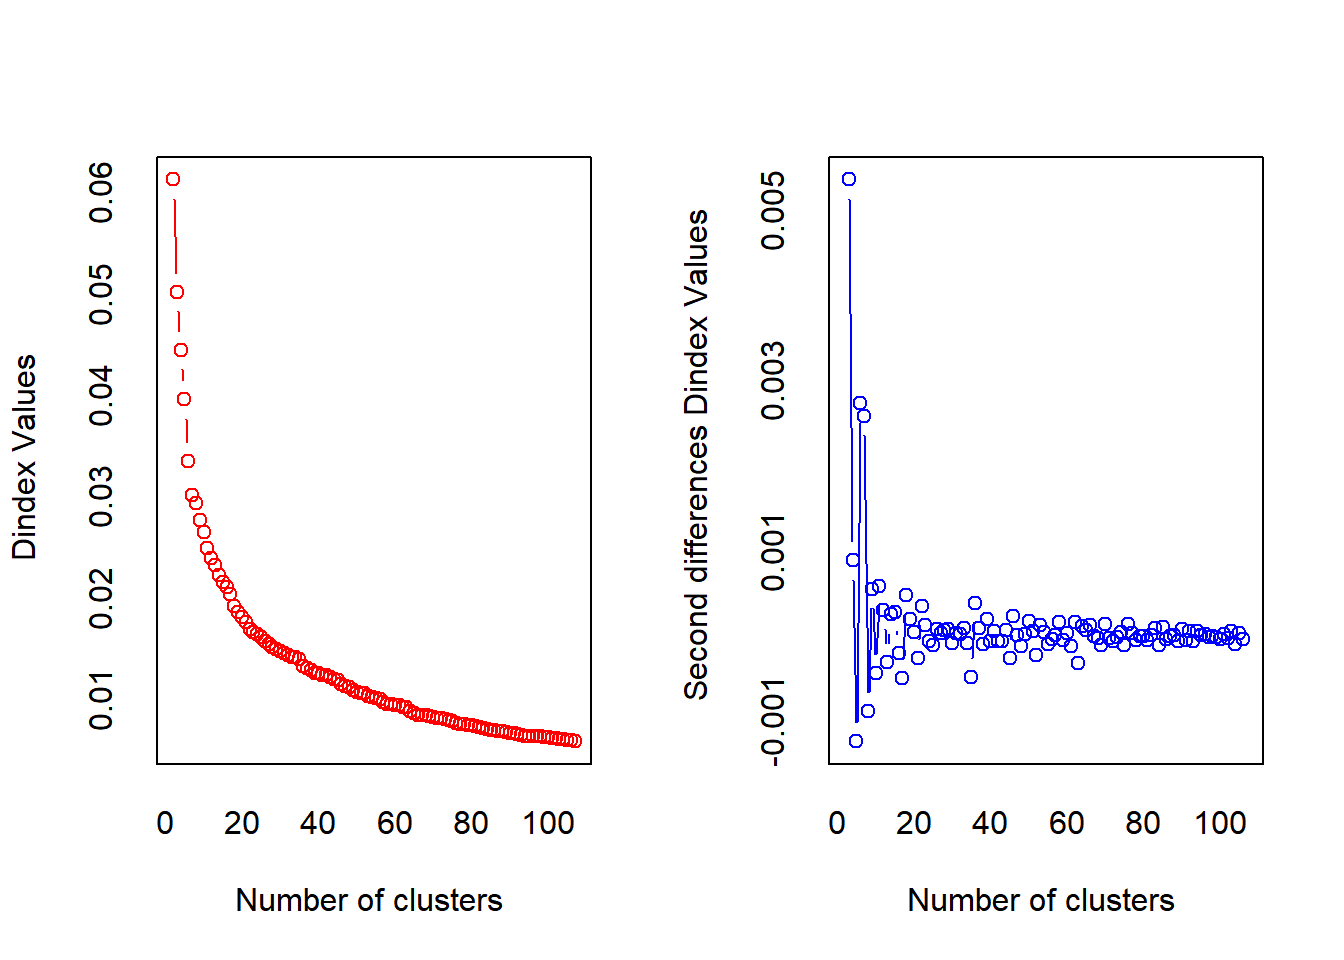

``` hljs
## *** : The D index is a graphical method of determining the number of clusters. 
##                 In the plot of D index, we seek a significant knee (the significant peak in Dindex
##                 second differences plot) that corresponds to a significant increase of the value of
##                 the measure. 
##  
## ******************************************************************* 
## * Among all indices:                                                
## * 8 proposed 2 as the best number of clusters 
## * 6 proposed 3 as the best number of clusters 
## * 1 proposed 6 as the best number of clusters 
## * 1 proposed 21 as the best number of clusters 
## * 1 proposed 59 as the best number of clusters 
## * 1 proposed 64 as the best number of clusters 
## * 1 proposed 85 as the best number of clusters 
## * 1 proposed 90 as the best number of clusters 
## * 1 proposed 95 as the best number of clusters 
## * 3 proposed 107 as the best number of clusters 
## 
##                    ***** Conclusion *****                            
##  
## * According to the majority rule, the best number of clusters is  2 
##  
##  
## *******************************************************************
```

``` r
print(nclust$Best.nc[1,])
```

``` hljs
##         KL         CH   Hartigan        CCC      Scott    Marriot     TrCovW 
##         59         95          3          2          3          6          3 
##     TraceW   Friedman      Rubin     Cindex         DB Silhouette       Duda 
##          3         64         85        107        107          2          2 
##   PseudoT2      Beale  Ratkowsky       Ball PtBiserial       Frey    McClain 
##          2          2          3          3          2          2          2 
##       Dunn     Hubert    SDindex     Dindex       SDbw 
##         90          0         21          0        107
```

``` r
print(table(nclust$Best.nc[1,]))
```

``` hljs
## 
##   0   2   3   6  21  59  64  85  90  95 107 
##   2   8   6   1   1   1   1   1   1   1   3
```

``` r
barplot(table(nclust$Best.nc[1,]), xlab="클러스터 수", ylab="영역 수", main="Number")
```

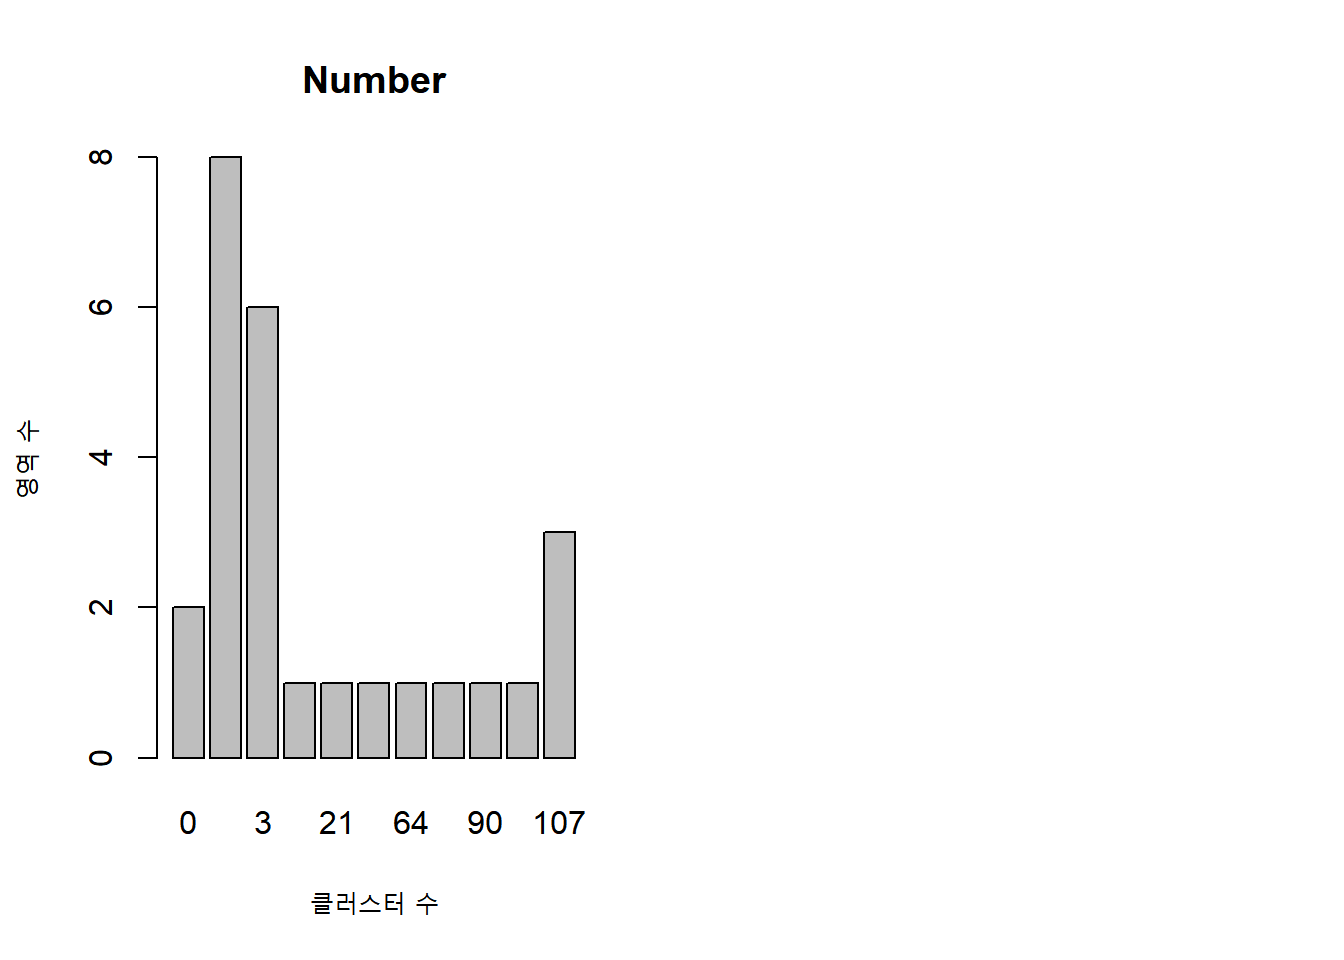

``` r
# k=2
km <- kmeans(df1, 2, nstart=25)
print(km$centers)
```

``` hljs
##       위도     경도
## 1 37.52970 126.8979
## 2 37.55679 127.0588
```

``` r
plot(df1, col=km$cluster)
points(km$centers, col="#56B4E9",bg="#56B4E9", pch=22, type="p",cex=2)
```

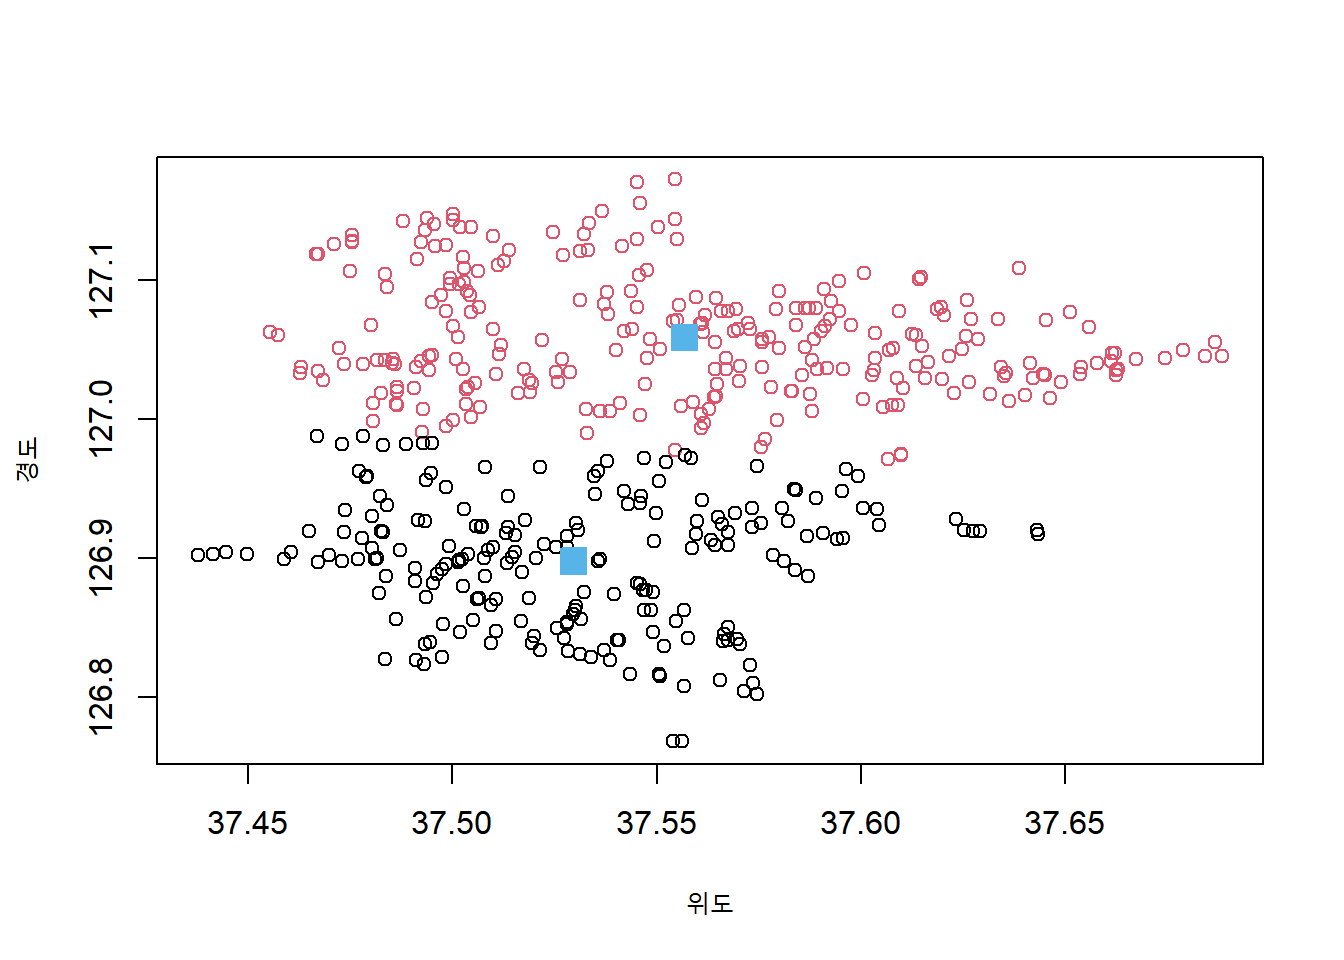

``` r
# k=3
km3 <- kmeans(df1, 3, nstart=25)
km3$centers
```

``` hljs
##       위도     경도
## 1 37.53034 126.8934
## 2 37.60471 127.0426
## 3 37.50725 127.0682
```

``` r
plot(df1, col=km3$cluster)
points(km3$centers, col="#56B4E9", bg="#56B4E9",pch=22, type="p",cex=2)
```

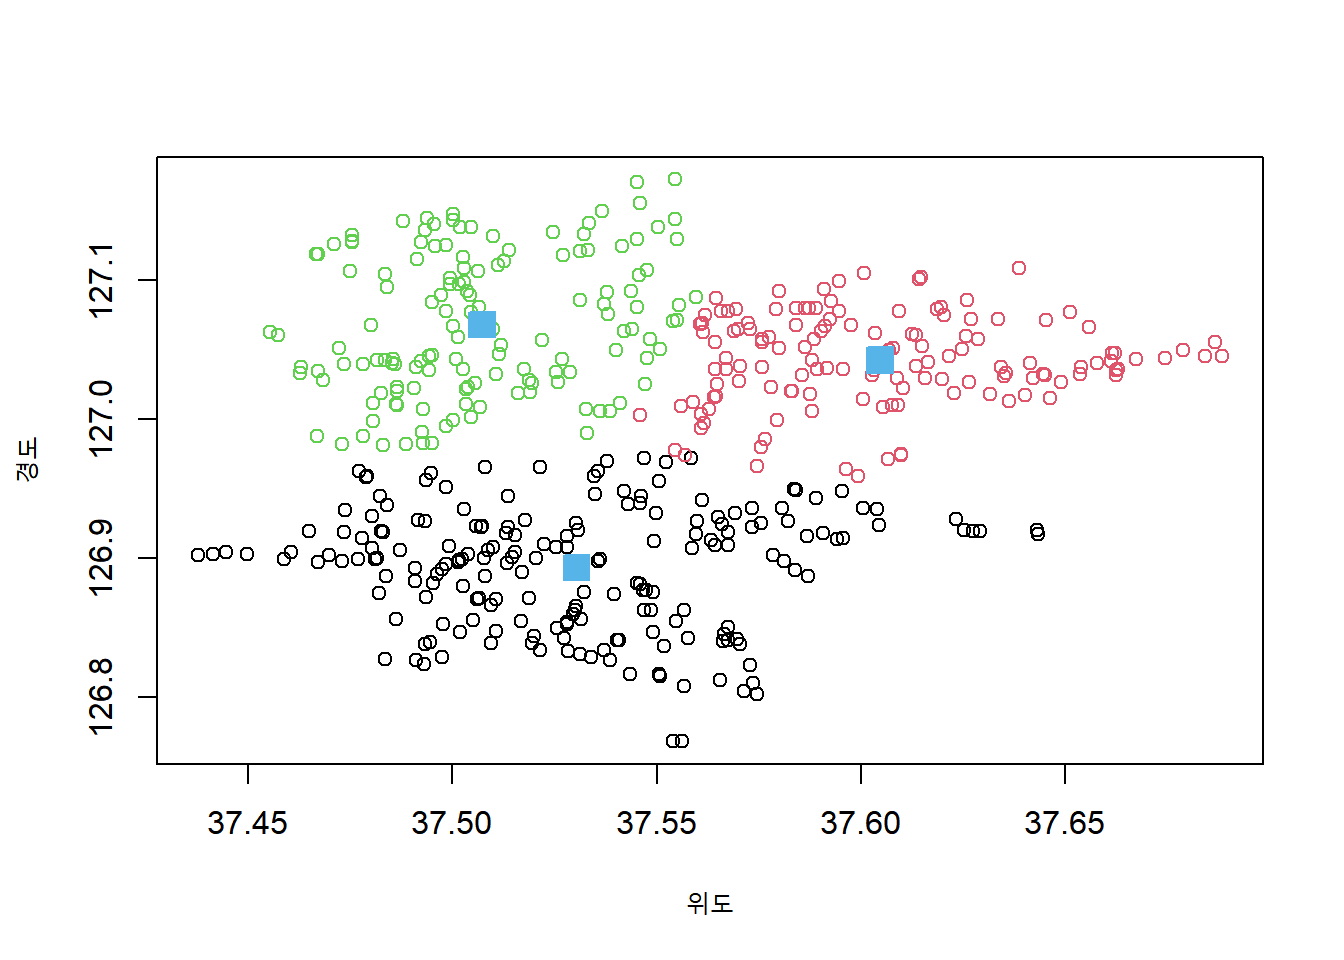